In [ ]:
import pandas as pd
import numpy as np
import sklearn
import nltk # natural language toolkit
import matplotlib.pyplot as plt
import seaborn as sns
import re # regular expression
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stats 101C Final Proj/IMDB Dataset.csv')
df.iloc[0,0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Exploratory Data Analysis

### basics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### class distribution (balanced: yes)

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

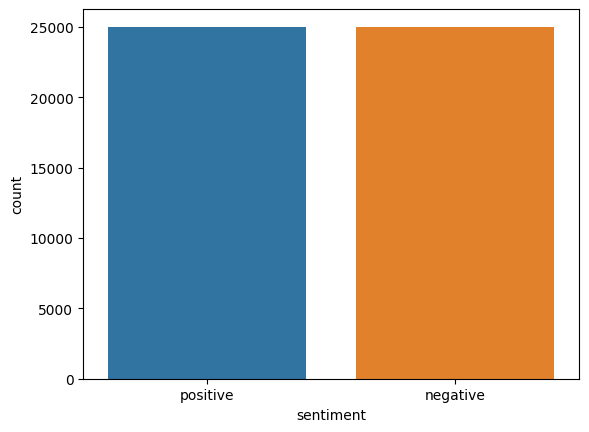

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.show()

### text statistics

In [ ]:
# length of reviews
df['review_length'] = df['review'].apply(len)
print(df['review_length'].describe())

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


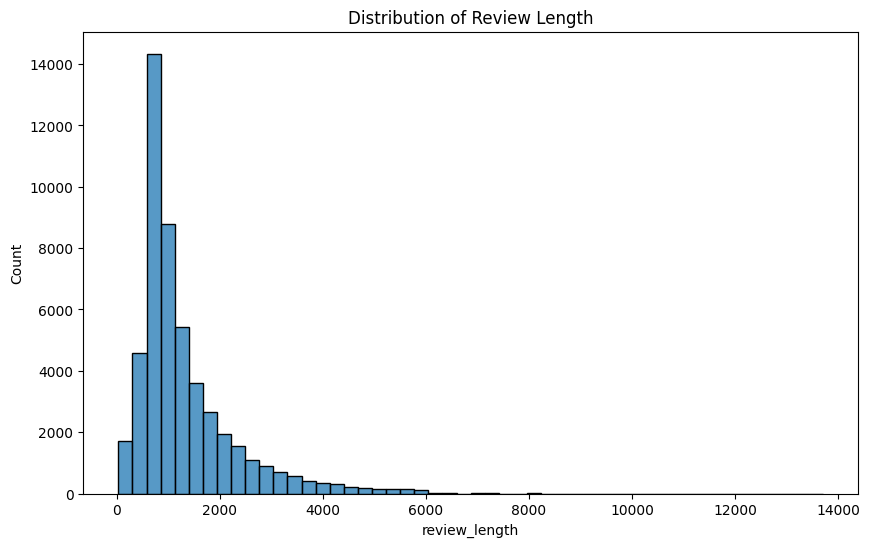

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Length')
plt.show()

### word clouds

In [ ]:
# do this later bc idk how

## Data cleaning (tbh this should be before EDA)

In [ ]:
le = LabelEncoder()
df['sentiment_binary'] = le.fit_transform(df['sentiment'])
df.head()

,review,sentiment,review_length,sentiment_binary
0,One of the other reviewers has mentioned that ...,positive,1761,1
1,A wonderful little production. <br /><br />The...,positive,998,1
2,I thought this was a wonderful way to spend ti...,positive,926,1
3,Basically there's a family where a little boy ...,negative,748,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,1


In [ ]:
# remove html line breaks ("<br />")
df['review'] = df['review'].apply(lambda x: re.sub(r'<br\s*/?>', ' ', x))
df.iloc[0,0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.  It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  I would say the main appeal of the show is due to the fact that it goes where other sh

In [ ]:
# make all lowercase
df['review'] = df['review'].str.lower()
df.iloc[0,0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.  the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.  it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  i would say the main appeal of the show is due to the fact that it goes where other sh

In [ ]:
# remove punctuation and special characters and numbers
df['review'] = df['review'].str.replace('[^\w\s]', '', regex=True)
df['review'] = df['review'].str.replace('\d+', '', regex=True)
df.iloc[0,0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with me  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away  i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty p

In [ ]:
# note: maybe don't remove numbers because numbers are used in some of the opinion lexicon words??

In [ ]:
#remove double space

### tokenize data (tbh maybe not necessary?)

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['tokens'] = df['review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,review,sentiment,review_length,sentiment_binary,tokens
0,one of the other reviewers has mentioned that ...,positive,1761,1,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming te...,positive,998,1,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,926,1,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically theres a family where a little boy j...,negative,748,0,"[basically, theres, a, family, where, a, littl..."
4,petter matteis love in the time of money is a ...,positive,1317,1,"[petter, matteis, love, in, the, time, of, mon..."


### eliminate useless words

In [ ]:
# REDO THIS WITHOUT TOKENIZATION

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df['tokens'] = df['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# combine tokens back into sentences:
df['review'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df.head()

,review,sentiment,review_length,sentiment_binary,tokens
0,one reviewers mentioned watching oz episode yo...,positive,1761,1,"[one, reviewers, mentioned, watching, oz, epis..."
1,wonderful little production filming technique ...,positive,998,1,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,926,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,negative,748,0,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love time money visually stunni...,positive,1317,1,"[petter, matteis, love, time, money, visually,..."


In [ ]:
df.head()

,review,sentiment,review_length,sentiment_binary,tokens
0,one reviewers mentioned watching oz episode yo...,positive,1761,1,"[one, reviewers, mentioned, watching, oz, epis..."
1,wonderful little production filming technique ...,positive,998,1,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,926,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,negative,748,0,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love time money visually stunni...,positive,1317,1,"[petter, matteis, love, time, money, visually,..."


In [ ]:
# transform adverbs to adjectives???
# no need, adverbs included in lexicon

# idk do this later

## word frequency

In [ ]:
# figure this out later... some sort of exploratory data analysis with word clouds

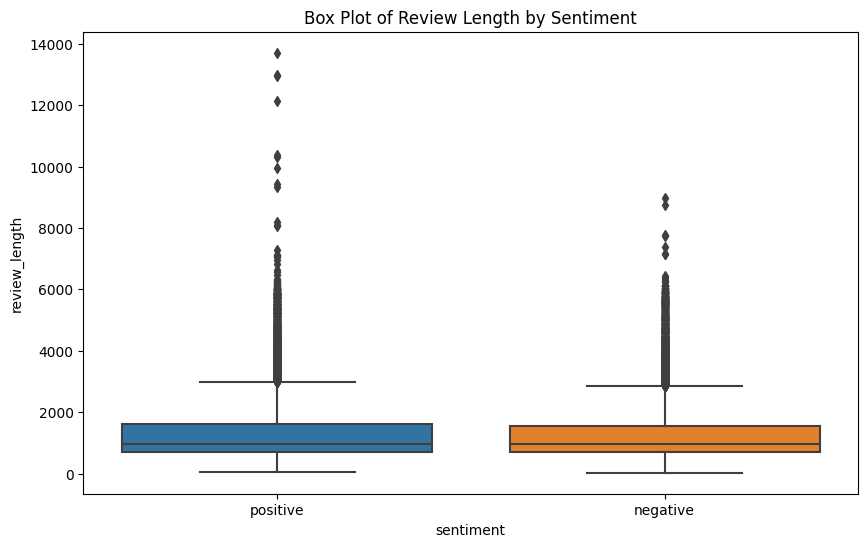

In [ ]:
# box plot
# this is to show if there is a relationship btwn review len and sentiment
# answer is prob not lol
plt.figure(figsize=(10, 6)) # change size if we choose to include
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Box Plot of Review Length by Sentiment')
plt.show()

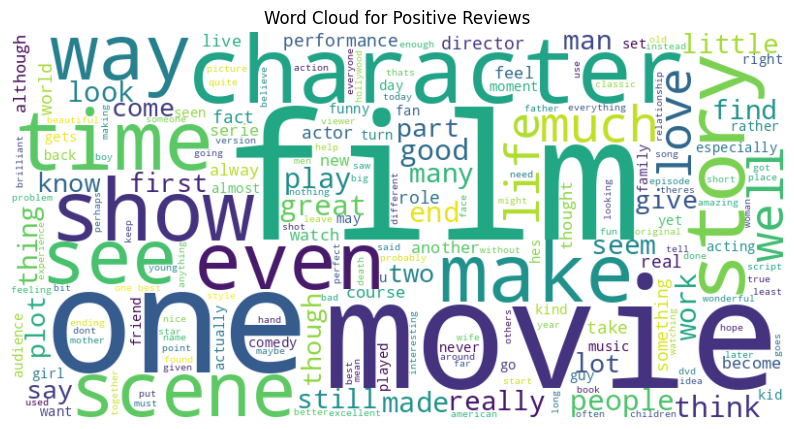

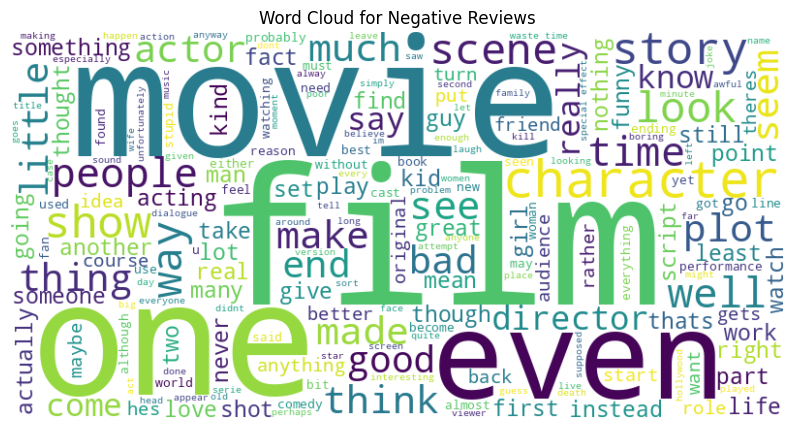

In [ ]:
from wordcloud import WordCloud

positive_reviews = df[df['sentiment'] == 'positive']['tokens'].explode().dropna()
negative_reviews = df[df['sentiment'] == 'negative']['tokens'].explode().dropna()

# positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 6)) # change depending on paper
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))
plt.figure(figsize=(10, 6)) # change size
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

# ngl this is kind of useless

## opinion lexicon

In [ ]:
pos_lexicon = pd.read_csv("/content/drive/MyDrive/Stats 101C Final Proj/positive-words-copy.txt", sep = " ", header=None, names=["word"])
neg_lexicon = pd.read_csv("/content/drive/MyDrive/Stats 101C Final Proj/negative-words-copy.txt", sep = " ", header=None, names=["word"])

In [ ]:
combined_lexicon = pd.concat([pos_lexicon, neg_lexicon], axis=1, ignore_index=True)
combined_lexicon.columns = ['word', 'sentiment']
combined_lexicon.head()

,word,sentiment
0,a+,2-faced
1,abound,2-faces
2,abounds,abnormal
3,abundance,abolish
4,abundant,abominable


## TF-IDF

In [ ]:
# bag-of-words: matching our tokenized text data with the opinion lexicons
# we are not doing this.

In [ ]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
reviews = list(df['review'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
# in the example, they include min and max df
# vectorizer = TfidfVectorizer(stop_words='english', min_df=0.1, max_df=0.7)
X = vectorizer.fit_transform(reviews)

In [ ]:
print(X)

  (0, 33470)	0.07515344748353903
  (0, 146357)	0.058558761984498456
  (0, 153782)	0.1285167642548633
  (0, 149945)	0.07238420835137978
  (0, 27480)	0.07412002106637153
  (0, 46963)	0.0488808813806134
  (0, 130866)	0.06562993680296332
  (0, 137261)	0.05628282471811998
  (0, 78588)	0.049413746820827165
  (0, 14327)	0.10251354597694877
  (0, 148501)	0.050750462907249806
  (0, 25624)	0.05431661352534269
  (0, 89999)	0.0524521155841375
  (0, 86119)	0.08982418462329451
  (0, 102241)	0.0505797480871398
  (0, 76746)	0.048770239377624536
  (0, 70676)	0.1721083767492882
  (0, 97262)	0.11114413717939502
  (0, 132742)	0.071153834206663
  (0, 157735)	0.1915842917124391
  (0, 60211)	0.08012476689874659
  (0, 31733)	0.0846775187520815
  (0, 70645)	0.08494003810839541
  (0, 59177)	0.06672830875619482
  (0, 81002)	0.0662184542426357
  :	:
  (49999, 71265)	0.19181291184361535
  (49999, 80296)	0.09807207036116737
  (49999, 150648)	0.10898125514567947
  (49999, 77599)	0.11656663390173902
  (49999, 123655)

In [ ]:
X.get_shape() # woahhh large

(50000, 162401)

## PCA for dimension reduction

In [ ]:
# lol maybe redo pca

In [ ]:
# PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'X' is your TF-IDF matrix

# Perform Truncated SVD (PCA)
n_components = 500
svd = TruncatedSVD(n_components=n_components)
X_pca = svd.fit_transform(X)

"""
# Plot the results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], marker='o', alpha=0.5)

# Set axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set plot title
ax.set_title('PCA on TF-IDF Matrix')

plt.show()
"""

"\n# Plot the results in 3D\nfig = plt.figure(figsize=(8, 6))\nax = fig.add_subplot(111, projection='3d')\n\n# Scatter plot\nax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], marker='o', alpha=0.5)\n\n# Set axis labels\nax.set_xlabel('Principal Component 1')\nax.set_ylabel('Principal Component 2')\nax.set_zlabel('Principal Component 3')\n\n# Set plot title\nax.set_title('PCA on TF-IDF Matrix')\n\nplt.show()\n"

In [ ]:
X_pca.shape

(50000, 500)

In [ ]:
#SCREE PLOT to determine number of components for PCA

from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=500)

#fit PCA model to data
pca_fit = pca.fit(X_pca)

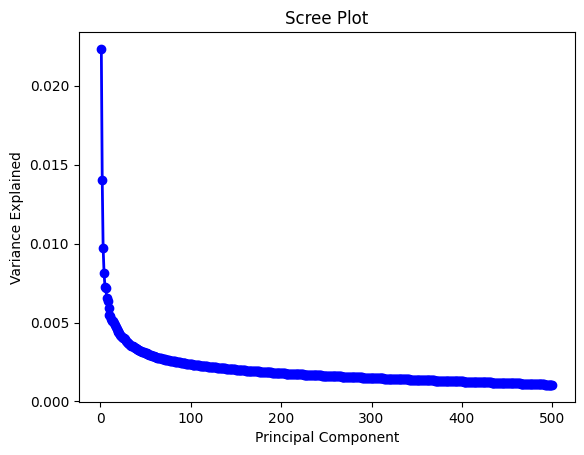

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# based on plot, choose 50 components

n_components = 50
svd = TruncatedSVD(n_components=n_components)
X_pca = svd.fit_transform(X)

In [ ]:
X_pca.shape

(50000, 50)

In [ ]:
# for testing purposes delete later
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'sentiment' is your target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display additional metrics
print(classification_report(y_test, predictions))


Accuracy: 0.85
              precision    recall  f1-score   support

    negative       0.87      0.82      0.84      4961
    positive       0.83      0.87      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

